MAE: 970043.40
MSE: 1754318687330.66
R² Score: 0.65


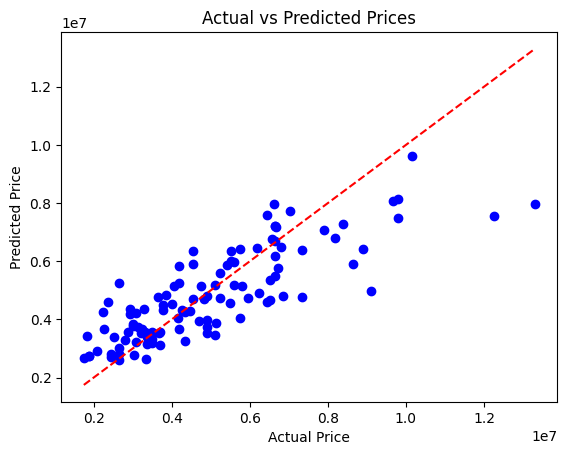

                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [1]:
# Task 3: Linear Regression - Housing Price Prediction

# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📥 Step 2: Load the Dataset
df = pd.read_csv("Housing.csv")  # Make sure to rename if needed
df.head()

# 🔍 Step 3: Preprocess the Data
# Convert categorical columns (e.g., 'furnishingstatus') using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Step 4: Split features and target
X = df.drop('price', axis=1)
y = df['price']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Step 6: Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔢 Step 7: Model Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 📉 Step 8: Visualize Results
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.show()

# 🧠 Step 9: Model Coefficients
coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
print(coeff_df)
